In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import joblib

In [2]:
# Download latest version
dataset_path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", dataset_path)
# Ghép đường dẫn tới file CSV
csv_file = os.path.join(dataset_path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")
# Đọc dữ liệu bằng pandas
df = pd.read_csv(csv_file)
# In ra 5 dòng đầu
print(df.head())

Path to dataset files: C:\Users\ADMIN\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber opt

# 5.1 Thu thập & Tiền Xử Lý Dữ Liệu (10%)

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
for column in (df.columns):
    print(column, ":" ,df[column].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [9]:
print(df['TotalCharges'].dtype)

object


In [10]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [11]:
num_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
])

In [12]:
MultipleLines = df["MultipleLines"].unique()
InternetService = df["InternetService"].unique()
OnlineSecurity = df["OnlineSecurity"].unique()
OnlineBackup = df["OnlineBackup"].unique()
DeviceProtection = df["DeviceProtection"].unique()
TechSupport = df["TechSupport"].unique()
StreamingTV = df["StreamingTV"].unique()
StreamingMovies = df["StreamingMovies"].unique()
Contract = df["Contract"].unique()
PaymentMethod = df["PaymentMethod"].unique()

ord_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
    ("encoder", OrdinalEncoder(categories=[MultipleLines, InternetService, OnlineSecurity, OnlineBackup, \
                                           DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod]))
])

In [13]:
nom_transformer = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="constant", fill_value="unknown")),
    ("encoder", OneHotEncoder(sparse_output=False))
])


In [14]:
preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["tenure", "MonthlyCharges", "TotalCharges"]),
    ("ordinal_features", ord_transformer, ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", \
                                          "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]),
    ("nominal_featutes", nom_transformer, ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "PaperlessBilling"])
])

In [15]:
df.to_csv("cleaned_telco.csv", index=False)

# 5.2 Phân Tích Dữ Liệu Khám Phá (EDA) (20%)

In [16]:
df1 = df.copy()

In [17]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [18]:
for column in (df1.columns):
    print(column + ": " + str(df1[column].unique()))

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

In [19]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


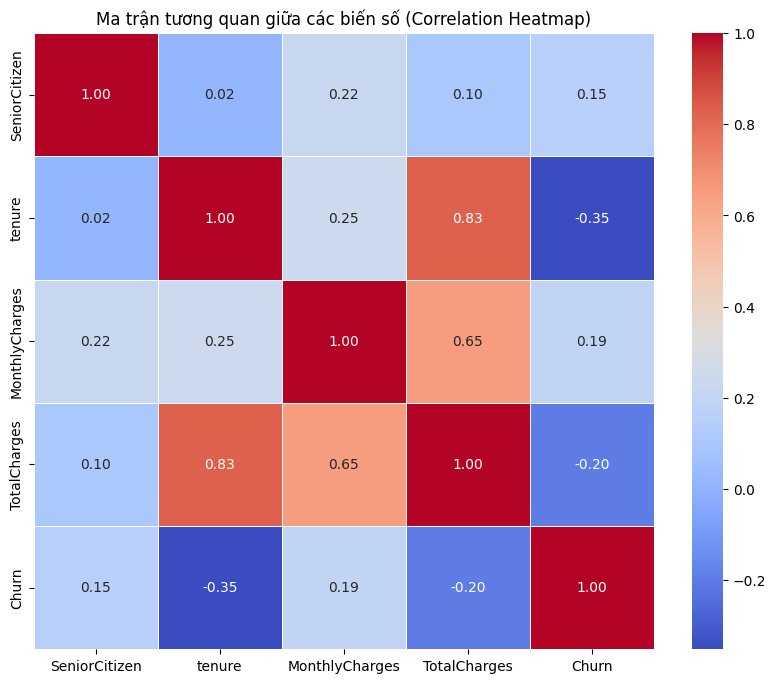

In [20]:
# --- Xử lý dữ liệu ---
df1["Churn"] = df1["Churn"].map({"Yes": 1, "No": 0})
df1["Churn"] = df1["Churn"].fillna(0).astype(int)
df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"], errors="coerce")

# --- Tính tương quan ---
corr = df1.corr(numeric_only=True)

# --- Hiển thị heatmap ---
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan giữa các biến số (Correlation Heatmap)")
plt.show()

## Dữ liệu định lượng

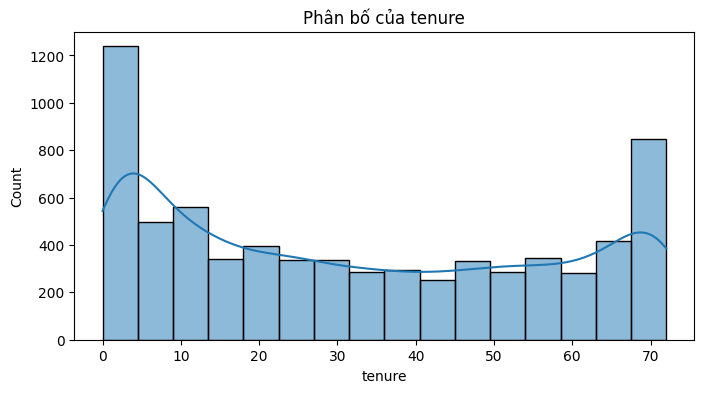

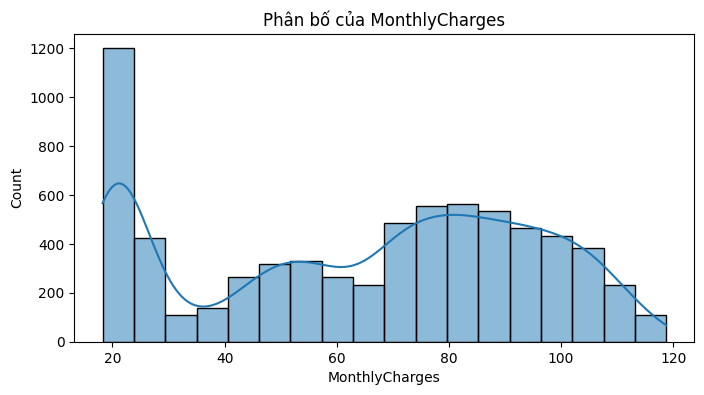

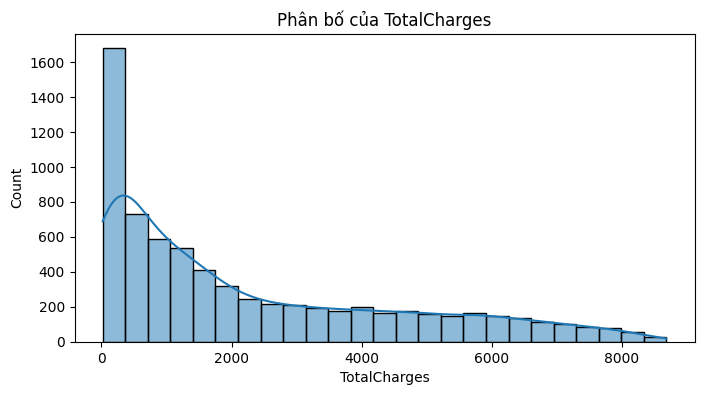

In [21]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df1[col], kde=True)
    plt.title(f"Phân bố của {col}")
    plt.show()


## Biến định tính

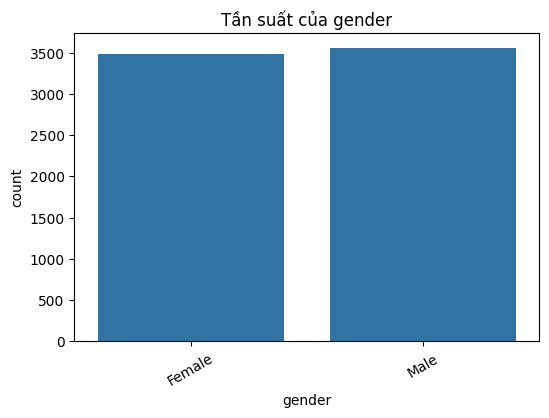

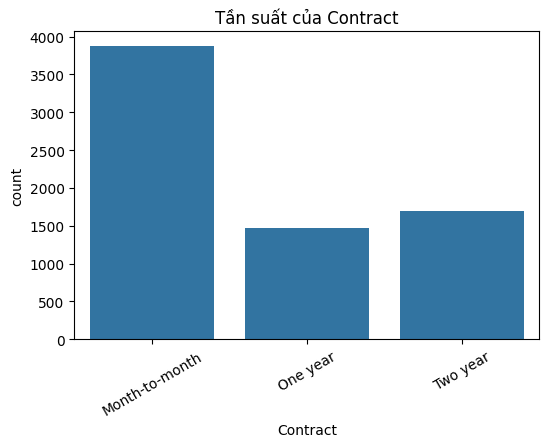

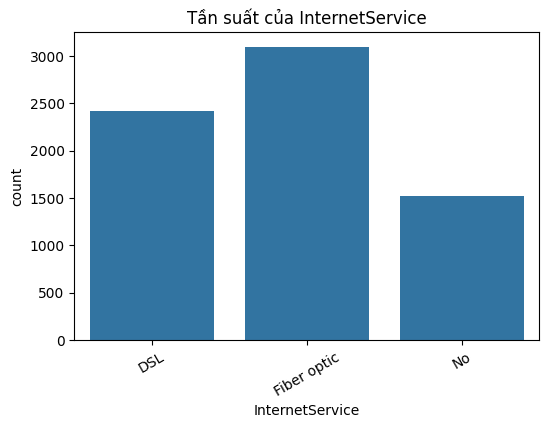

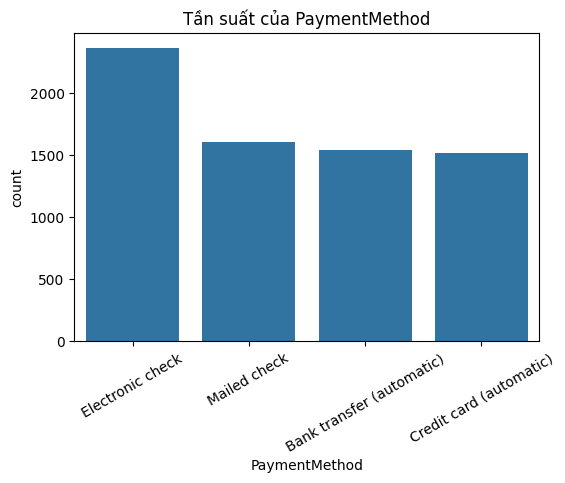

In [22]:
cat_cols = ['gender', 'Contract', 'InternetService', 'PaymentMethod']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df1[col])
    plt.title(f"Tần suất của {col}")
    plt.xticks(rotation=30)
    plt.show()

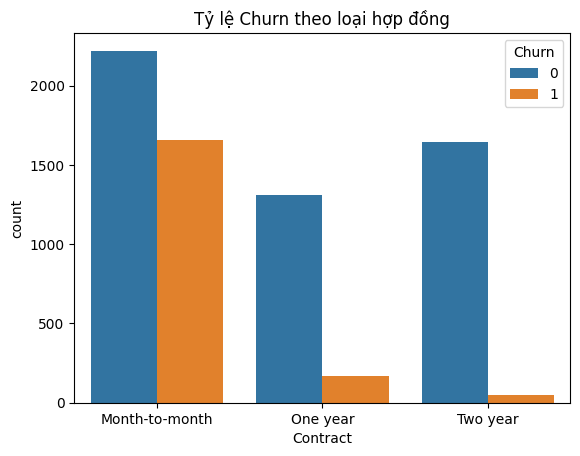

In [23]:
sns.countplot(x='Contract', hue='Churn', data=df1)
plt.title("Tỷ lệ Churn theo loại hợp đồng")
plt.show()

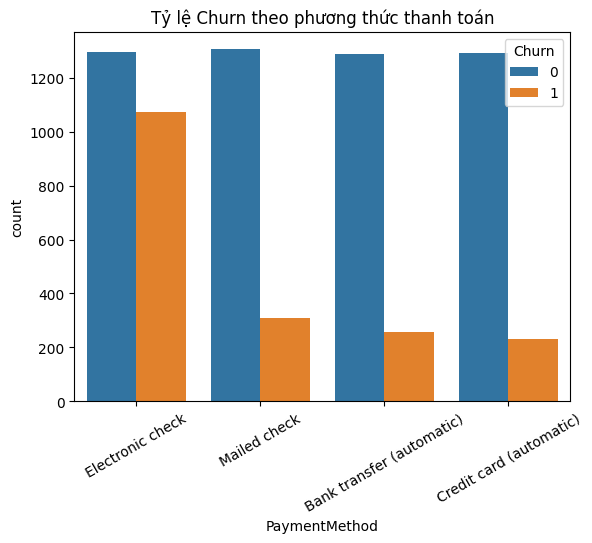

In [24]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df1)
plt.title("Tỷ lệ Churn theo phương thức thanh toán")
plt.xticks(rotation=30)
plt.show()

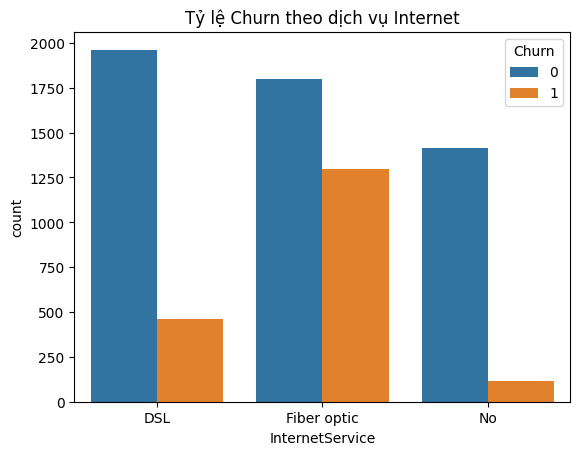

In [25]:
sns.countplot(x='InternetService', hue='Churn', data=df1)
plt.title("Tỷ lệ Churn theo dịch vụ Internet")
plt.show()

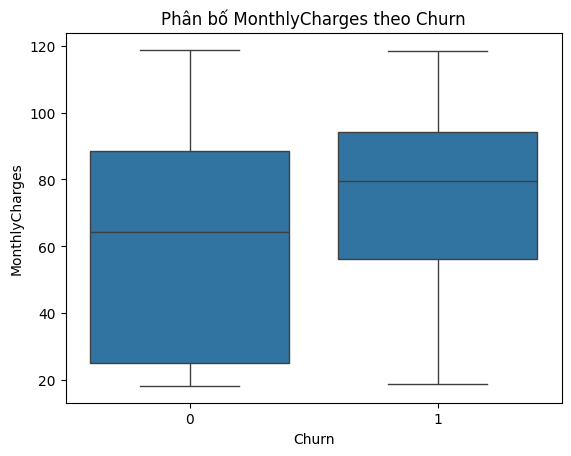

In [26]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df1)
plt.title("Phân bố MonthlyCharges theo Churn")
plt.show()

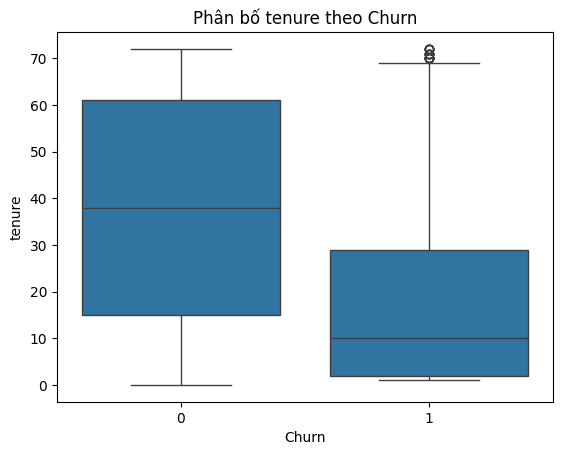

In [27]:
sns.boxplot(x='Churn', y='tenure', data=df1)
plt.title("Phân bố tenure theo Churn")
plt.show()

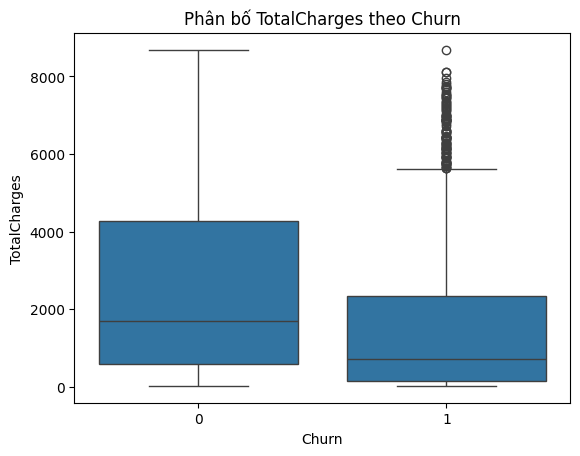

In [28]:
sns.boxplot(x='Churn', y='TotalCharges', data=df1)
plt.title("Phân bố TotalCharges theo Churn")
plt.show()

# 5.3 Xây Dựng Mô Hình Machine Learning (30%)

In [29]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [30]:
remove_column = ["customerID", "Churn"]
target = "Churn"
X = df.drop(remove_column, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [31]:
models_params = {
        "logreg": {
            "model": LogisticRegression(max_iter=1000),
            "params": {
                "model__C" : [0.1, 1, 10],
                "model__solver": ['lbfgs', 'liblinear', 'newton-cg', 'saga']
            }
        },
        "rfc": {
            "model": RandomForestClassifier(),
            "params": {
                "model__criterion": ['gini', 'entropy', 'log_loss'],
                "model__max_features": ["sqrt", "log2"]
            }
        },
        "XGBc": {
            "model": GradientBoostingClassifier(),
            "params": {
                "model__loss": ['log_loss', 'exponential'],
                "model__n_estimators": [80, 90, 100]
            }
        }
}

In [32]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


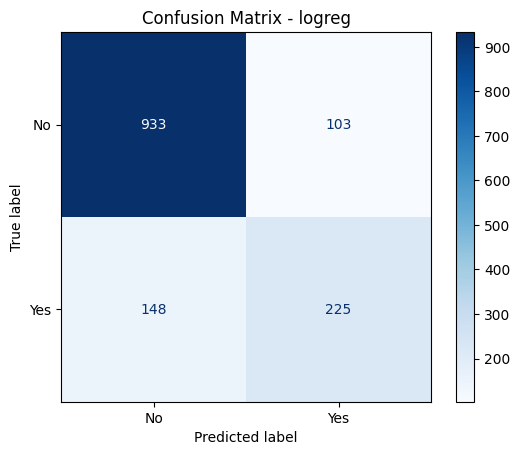

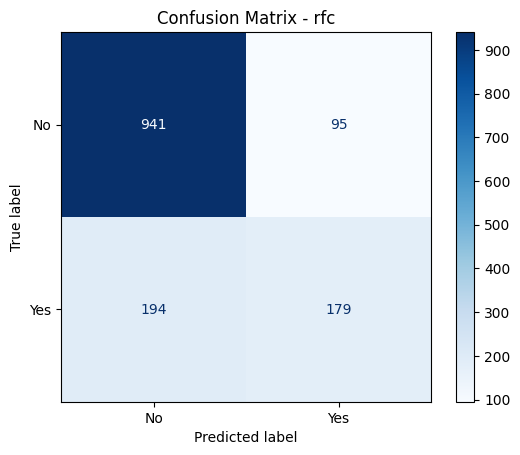

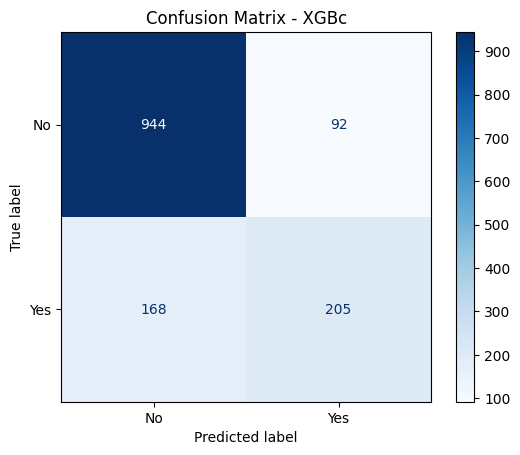

    model  best_cv_score  test_accuracy   test_f1  test_precision  \
0  logreg       0.799787       0.821859  0.641940        0.685976   
1     rfc       0.791976       0.794890  0.553323        0.653285   
2    XGBc       0.802450       0.815472  0.611940        0.690236   

   test_recall                                        best_params  
0     0.603217         {'model__C': 10, 'model__solver': 'lbfgs'}  
1     0.479893  {'model__criterion': 'log_loss', 'model__max_f...  
2     0.549598  {'model__loss': 'log_loss', 'model__n_estimato...  


In [33]:
results = []

for name, mp in models_params.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", mp["model"])
    ])
    
    clf = GridSearchCV(pipeline, mp['params'], cv=5, scoring="accuracy", n_jobs=-1)
    clf.fit(X_train, y_train)
    
    # Dự đoán trên tập test
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label="Yes")      # pos_label tùy thuộc vào cột "Churn"
    precision = precision_score(y_test, y_pred, pos_label="Yes")
    recall = recall_score(y_test, y_pred, pos_label="Yes")
    
    results.append({
        "model": name,
        "best_cv_score": clf.best_score_,
        "test_accuracy": acc,
        "test_f1": f1,
        "test_precision": precision,
        "test_recall": recall,
        "best_params": clf.best_params_
    })
    
    # Vẽ confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(cmap="Blues")
    disp.ax_.set_title(f"Confusion Matrix - {name}")
    plt.show()

df_results = pd.DataFrame(results)
print(df_results)


In [34]:
os.makedirs("saved_models", exist_ok=True)

for name, mp in models_params.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", mp["model"])
    ])
    
    clf = GridSearchCV(pipeline, mp['params'], cv=5, scoring="accuracy", n_jobs=-1)
    clf.fit(X_train, y_train)

    # Lưu best estimator ra file pkl
    model_path = f"saved_models/{name}_best_model.pkl"
    joblib.dump(clf.best_estimator_, model_path)
    print(f"✅ Saved {name} best model to {model_path}")


✅ Saved logreg best model to saved_models/logreg_best_model.pkl
✅ Saved rfc best model to saved_models/rfc_best_model.pkl
✅ Saved XGBc best model to saved_models/XGBc_best_model.pkl
